# HOUSING_DATA

#### Step 1: import and observe data

In [1]:
import pandas as pd

housing_data = pd.DataFrame(pd.read_csv('/Users/santiagowon/Dropbox/Santiago/01. Maestria/Advaced Mathematics and Statistics/Element 1 Assignment/data/housing.csv'))
housing_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


We can observe out data and understand that it look suitable for a regression, specially regarding on how to predict the price of housing. We might night to clean some data and prepare it to check suitability. There is a mix regarding numeric and categorical data.

#### Step 2: Clean data

In [2]:
#Convert Binary Variables

housing_data = pd.get_dummies(housing_data, columns=['furnishingstatus']) #Create 3 columns for furnishing data
housing_data['mainroad'] = housing_data['mainroad'].map({'yes': 1, 'no': 0})
housing_data['guestroom'] = housing_data['guestroom'].map({'yes': 1, 'no': 0})
housing_data['basement'] = housing_data['basement'].map({'yes': 1, 'no': 0})
housing_data['hotwaterheating'] = housing_data['hotwaterheating'].map({'yes': 1, 'no': 0})
housing_data['airconditioning'] = housing_data['airconditioning'].map({'yes': 1, 'no': 0})
housing_data['prefarea'] = housing_data['prefarea'].map({'yes': 1, 'no': 0})

housing_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


#### Step 3: Check for linearity, independence of errors, homoscedasticity, and normality of errors.

Mean Squared Error: 1754318687330.6638


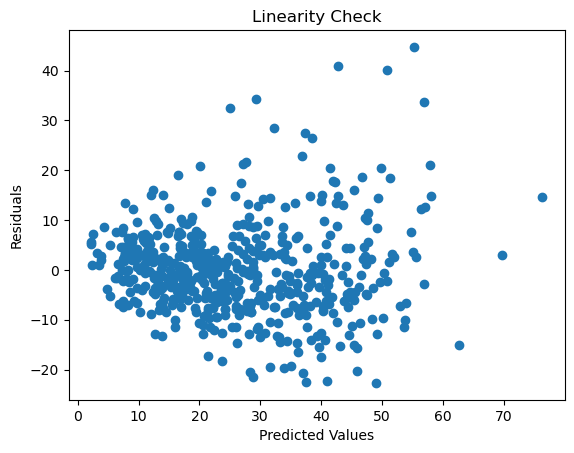

Durbin-Watson Statistic: 1.2093956266265002


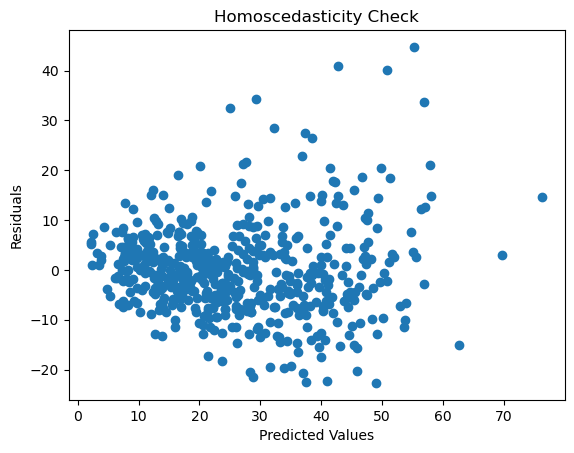

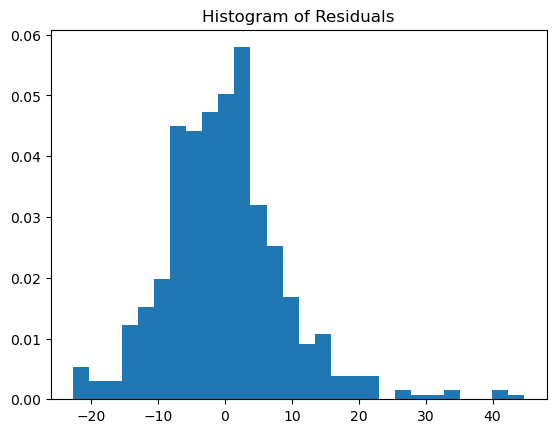

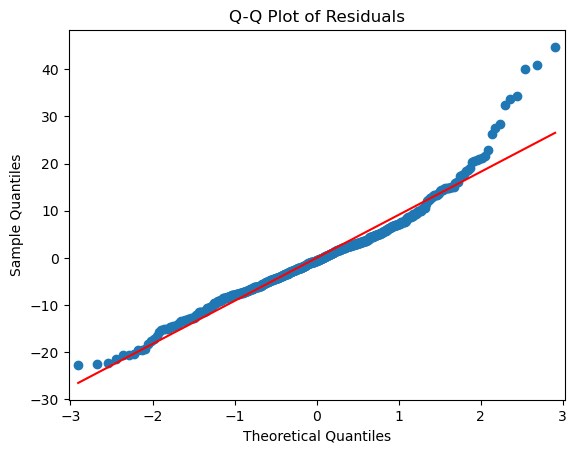

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

X = housing_data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
y = housing_data['price']


X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant).fit()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

residuals = model.resid

# Linearity: Scatter plot of residuals against predicted values
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check')
plt.show()

# Independence of Errors: Durbin-Watson test - https://medium.com/@analyttica/durbin-watson-test-fde429f79203#:~:text=The%20Durbin%20Watson%20(DW)%20statistic%20is%20used%20as%20a%20test,in%20reality%20they%20are%20not.
durbin_watson_stat = sm.stats.durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {durbin_watson_stat}')

# Homoscedasticity: Scatter plot of residuals against predicted values
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.show()

# Normality of Errors: Histogram and Q-Q plot
plt.hist(residuals, bins='auto', density=True)
plt.title('Histogram of Residuals')
plt.show()

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()





**Mean Squared Error (MSE):**

MSE: 1,754,318,687,330.6638 is a large value, indicating a significant amount of variance between predicted and actual values. This could suggest that the model might not be fitting the data well.

https://www.simplilearn.com/tutorials/statistics-tutorial/mean-squared-error#:~:text=Mean%20square%20error%20is%20calculated,smaller%20MSE%20suggests%20the%20opposite.


**Durbin-Watson Statistic:**

Durbin-Watson Statistic: 1.209 indicates a potential presence of autocorrelation in the residuals. DW test statistic values in the range of 1.5 to 2.5 are relatively normal. Values outside this range could, however, be a cause for concern. Your result suggests a potential issue.
https://www.investopedia.com/terms/d/durbin-watson-statistic.asp


**Linearity Check (Scatter Plot):**

If the scatter plot for linearity does not show a clear line, it may indicate that the relationship between the independent and dependent variables is not strictly linear. Consider exploring non-linear relationships or additional features.


**Homoscedasticity (Residuals vs. Fitted Values):**

If the residuals are not evenly distributed across all levels of the predicted values, it indicates an issue with homoscedasticity. The concentration of dots in the lower left side suggests that the model might have difficulty predicting higher values.


**Histogram of Residuals:**

A histogram with a slight tail on the right suggests that the residuals might not be normally distributed. The presence of a larger tail on the right indicates that the model tends to overestimate certain values.

#### Step 4: Addressing the issues

We will try to normalize the values of price and area.

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Reshape the 'price' column to a 2D array for scaling
price_array = housing_data['price'].values.reshape(-1, 1)

# Fit and transform the scaler on the 'price' column
normalized_price = scaler.fit_transform(price_array)

# Replace the original 'price' column with the normalized values
housing_data['normalized_price'] = normalized_price

#########

# Reshape the 'area' column to a 2D array for scaling
area_array = housing_data['area'].values.reshape(-1, 1)

# Fit and transform the scaler on the 'area' column
normalized_area = scaler.fit_transform(area_array)

# Replace the original 'area' column with the normalized values
housing_data['normalized_area'] = normalized_area

housing_data['normalized_price'] = housing_data['normalized_price'] * 100
housing_data['normalized_area'] = housing_data['normalized_area'] * 100



### With the normalized values: Check for linearity, independence of errors, homoscedasticity, and normality of errors.

In [14]:
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'normalized_price' is the normalized target variable and 'normalized_area' is the normalized feature
X = housing_data[['normalized_area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
y = housing_data['normalized_price']
housing_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,normalized_price,normalized_area,price_per_area
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0,100.000000,39.656357,1792.452830
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0,90.909091,50.240550,1367.187500
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0,90.909091,57.113402,1229.919679
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0,90.606061,40.206186,1628.666667
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0,83.636364,39.656357,1537.735849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1,0.606061,9.278351,606.666667
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0,0.148485,5.154639,736.312500
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1,0.000000,13.539519,483.425414
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0,0.000000,8.659794,601.374570


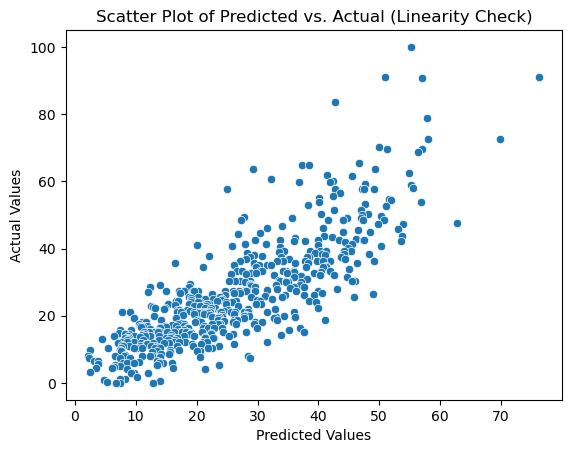

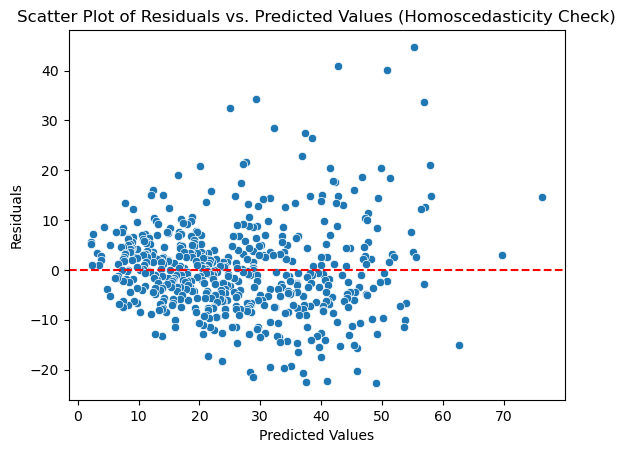

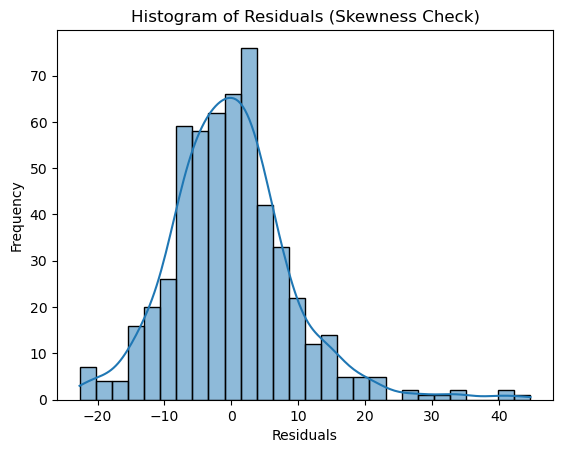

                           Variable        VIF
0                   normalized_area   1.325250
1                          bedrooms   1.369477
2                         bathrooms   1.286621
3                           stories   1.478055
4                          mainroad   1.172728
5                         guestroom   1.212838
6                          basement   1.323050
7                   hotwaterheating   1.041506
8                   airconditioning   1.211840
9                           parking   1.212837
10                         prefarea   1.149196
11       furnishingstatus_furnished   8.136430
12  furnishingstatus_semi-furnished  11.752679
13     furnishingstatus_unfurnished   8.349772


In [15]:

# Fit the regression model
X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant).fit()

# Linearity: Scatter plot of predicted vs. actual values
predicted_values = model.predict(X_with_constant)
sns.scatterplot(x=predicted_values, y=y)
plt.title('Scatter Plot of Predicted vs. Actual (Linearity Check)')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Homoscedasticity: Scatter plot of residuals vs. predicted values
residuals = y - predicted_values
sns.scatterplot(x=predicted_values, y=residuals)
plt.title('Scatter Plot of Residuals vs. Predicted Values (Homoscedasticity Check)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

# Skewness: Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals (Skewness Check)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# VIF for multicollinearity check
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


### Correcting the right-skewed distribution

In [16]:
import numpy as np

# Logarithmic transformation to correct positive skewness
y = np.log1p(housing_data['normalized_price'])


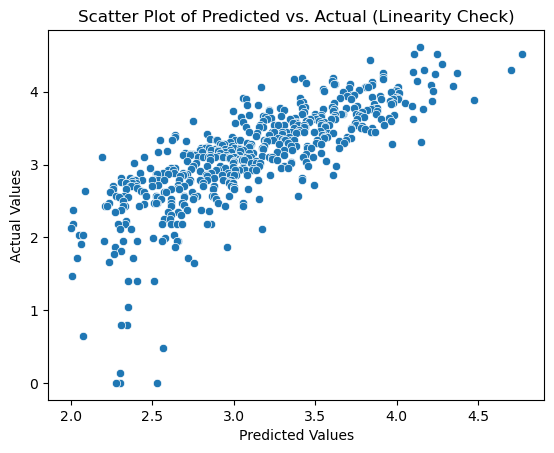

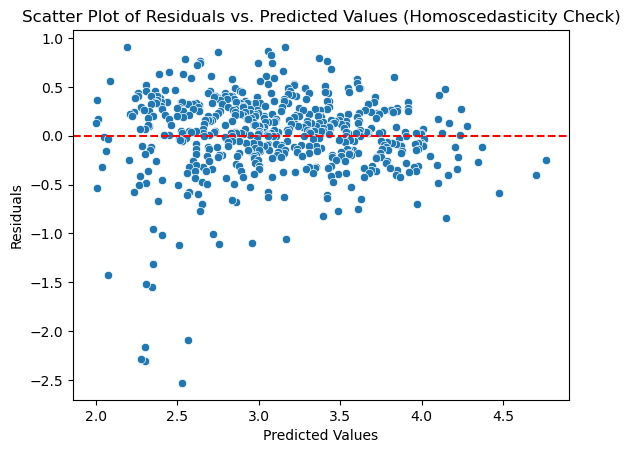

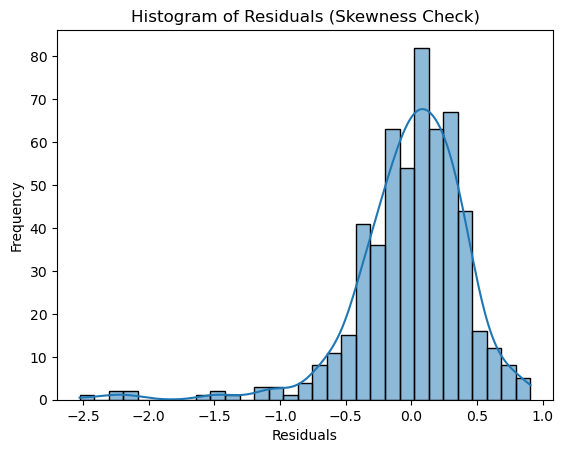

                           Variable        VIF
0                   normalized_area   1.325250
1                          bedrooms   1.369477
2                         bathrooms   1.286621
3                           stories   1.478055
4                          mainroad   1.172728
5                         guestroom   1.212838
6                          basement   1.323050
7                   hotwaterheating   1.041506
8                   airconditioning   1.211840
9                           parking   1.212837
10                         prefarea   1.149196
11       furnishingstatus_furnished   8.136430
12  furnishingstatus_semi-furnished  11.752679
13     furnishingstatus_unfurnished   8.349772


In [17]:
model = sm.OLS(y, X_with_constant).fit()

# Scatter plot of predicted vs. actual values after the logarithmic transformation
predicted_values = model.predict(X_with_constant)
sns.scatterplot(x=predicted_values, y=y)
plt.title('Scatter Plot of Predicted vs. Actual (Linearity Check)')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Scatter plot of residuals vs. predicted values after the logarithmic transformation
residuals = y - predicted_values
sns.scatterplot(x=predicted_values, y=residuals)
plt.title('Scatter Plot of Residuals vs. Predicted Values (Homoscedasticity Check)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

# Histogram of residuals after the logarithmic transformation
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals (Skewness Check)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# VIF for multicollinearity check
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


#### Step 5: Create model and  a linear regression

In [18]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


X = housing_data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
X = sm.add_constant(X)
y = np.log1p(housing_data['price'] + 1e-8)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     94.84
Date:                Sat, 02 Dec 2023   Prob (F-statistic):          4.20e-129
Time:                        14:06:16   Log-Likelihood:                 93.010
No. Observations:                 545   AIC:                            -158.0
Df Residuals:                     531   BIC:                            -97.81
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Mean Squared Error: 0.04161903014341963


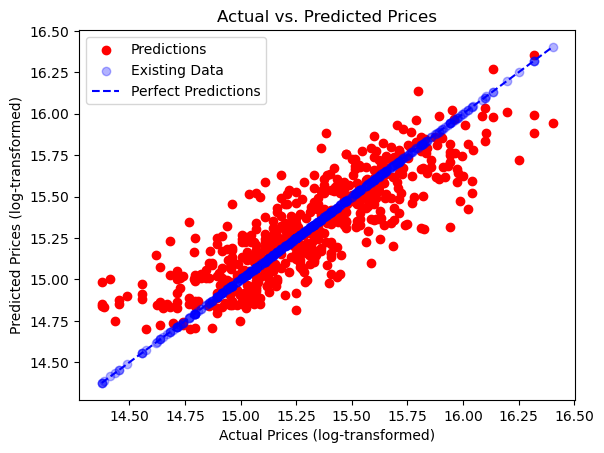

In [19]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

X = housing_data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
X = sm.add_constant(X)
y_actual = np.log1p(housing_data['price'] + 1e-8)

# Predict the values
y_pred = model.predict(X)

# Calculate Mean Squared Error
mse = mean_squared_error(y_actual, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the existing data points and predictions
plt.scatter(y_actual, y_pred, label='Predictions', color='red')
plt.scatter(y_actual, y_actual, label='Existing Data', color='blue', alpha=0.3)
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], linestyle='--', color='blue', label='Perfect Predictions')
plt.xlabel('Actual Prices (log-transformed)')
plt.ylabel('Predicted Prices (log-transformed)')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()


#### Step 6 : Inferential Analysis

For the following data, we will try to identify if...
1. There is no significant correlation between the number of bedrooms and the house price
2. There is a signifficant difference among mean prices in houses with hotwaterheating offer

In [20]:
# Create a new column 'price_per_area'
housing_data['price_per_area'] = housing_data['price'] / housing_data['area']

In [21]:
# Calculate correlations with other features
correlations = housing_data.corr()['price_per_area'].sort_values(ascending=False)

# Print correlations
print(correlations)

price_per_area                     1.000000
price                              0.392921
normalized_price                   0.392921
stories                            0.303850
bathrooms                          0.283839
bedrooms                           0.229549
basement                           0.180458
airconditioning                    0.161690
hotwaterheating                    0.129581
prefarea                           0.108161
furnishingstatus_semi-furnished    0.095770
furnishingstatus_furnished         0.090576
guestroom                          0.080247
parking                            0.002418
mainroad                          -0.031501
furnishingstatus_unfurnished      -0.185057
area                              -0.465517
normalized_area                   -0.465517
Name: price_per_area, dtype: float64


Conclusions:

Size-related features such as area, number of stories, bedrooms, bathrooms, and presence of amenities like basement and air conditioning are positively correlated with 'price_per_area.' On the other hand, being on the main road and having an unfurnished status show negative correlations with 'price_per_area.' 

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'price ~ C(mainroad) + C(hotwaterheating) + C(airconditioning) + C(prefarea) + C(furnishingstatus_furnished) +  C(furnishingstatus_unfurnished)'
model = ols(formula, data=housing_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print(anova_table)


                                       sum_sq     df           F        PR(>F)
C(mainroad)                      5.773465e+13    1.0   26.616510  3.494665e-07
C(hotwaterheating)               4.280237e+13    1.0   19.732515  1.081767e-05
C(airconditioning)               2.901016e+14    1.0  133.741046  8.846329e-28
C(prefarea)                      1.008201e+14    1.0   46.479524  2.493063e-11
C(furnishingstatus_furnished)    3.700483e+12    1.0    1.705976  1.920664e-01
C(furnishingstatus_unfurnished)  4.539157e+13    1.0   20.926173  5.930679e-06
Residual                         1.166991e+15  538.0         NaN           NaN


C(mainroad), C(hotwaterheating), C(airconditioning), C(prefarea), and C(furnishingstatus_unfurnished) have p-values below 0.05, suggesting they are statistically significant.

C(furnishingstatus_furnished) has a p-value above 0.05, suggesting it may not be statistically significant in explaining the variance in the target variable

## Step 7: LOSS FUNCTION

In [23]:
# L1:

In [24]:
from sklearn.metrics import mean_absolute_error

y_actual = np.log1p(housing_data['price'] + 1e-8)
y_pred2 = model.predict(X)

l1_loss = mean_absolute_error(y_actual, y_pred)
print(f"Mean Absolute Error: {l1_loss}")

Mean Absolute Error: 0.15897136134424075


In [25]:
# L2:

In [26]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_actual, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.04161903014341963


MAE is 0.159, meaning, on average, predictions deviate by $159K from the actual prices.

MSE is 0.0416, suggesting relatively good model accuracy.

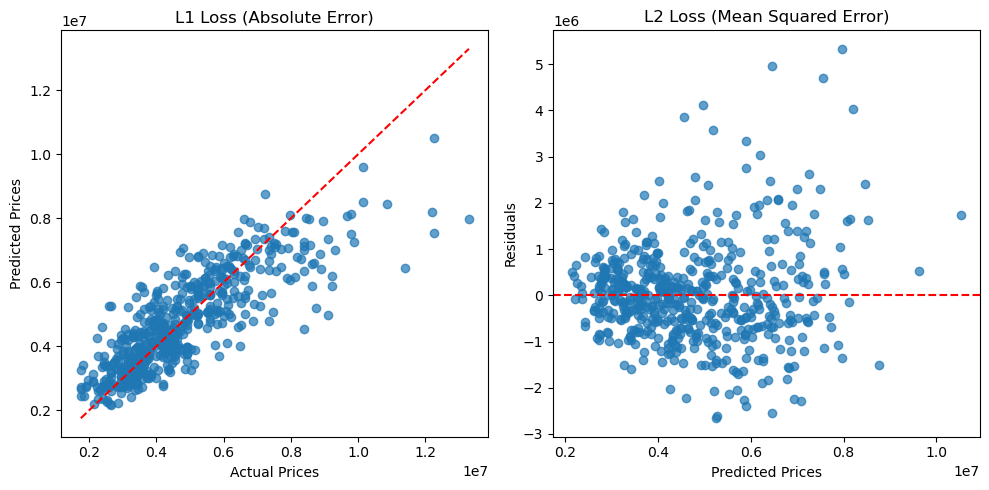

In [28]:
import matplotlib.pyplot as plt
import numpy as np


\
y_actual = housing_data['price']
y_predicted = linear_model.predict(housing_data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']])

# L1 Loss (Absolute Error) - Scatter Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_actual, y_predicted, alpha=0.7)
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--')
plt.title('L1 Loss (Absolute Error)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# L2 Loss (Mean Squared Error) - Residuals Plot
residuals = y_actual - y_predicted
plt.subplot(1, 2, 2)
plt.scatter(y_predicted, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('L2 Loss (Mean Squared Error)')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


In the residuals plot, MAE focuses on the absolute values of errors. The plot should show a consistent spread of residuals around zero, indicating that the model's predictions are, on average, equally accurate across various price levels.

In [29]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as nps

# R-squared (R²)
r_squared = r2_score(y_actual, y_pred)
print(f'R-squared: {r_squared}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
print(f'RMSE: {rmse}')


R-squared: -6.506514166656563
RMSE: 5119930.258033833


A negative value suggests that the model performs worse than a simple mean

These results indicate that the current model may not be effective in explaining the variability in the housing prices. It might be worth exploring different features, transformations, or models to improve the performance

In [30]:
### kernel transformation to linear space and then fit model and assess accuracy

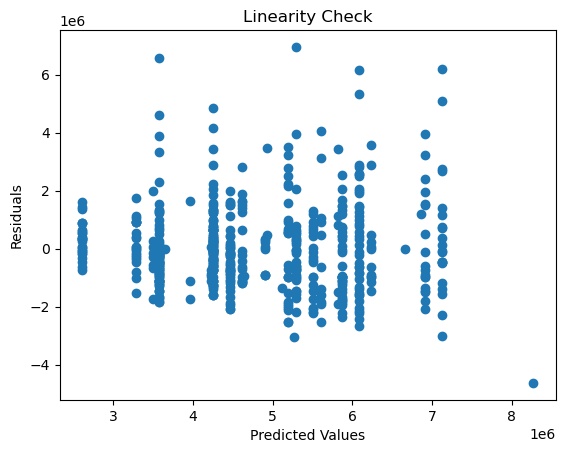

In [31]:

residuals = model.resid

# Linearity check: Scatter plot of residuals against predicted values
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check')
plt.show()


Mean Squared Error with Kernel Transformation: 2968536816861.464


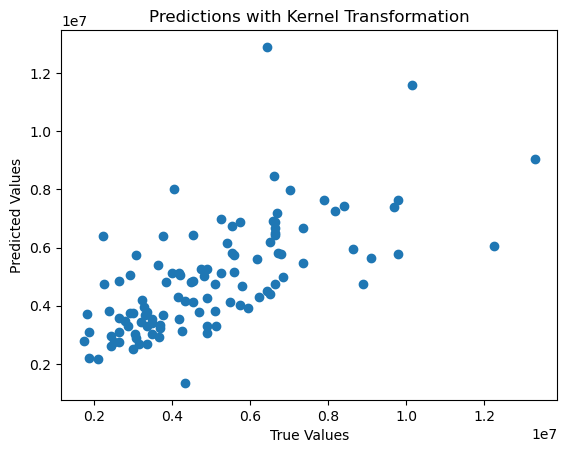

In [32]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


X = housing_data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = housing_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply RBF kernel transformation
# https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
rbf_feature = RBFSampler(gamma=0.00001, random_state=42)
X_train_transformed = rbf_feature.fit_transform(X_train)
X_test_transformed = rbf_feature.transform(X_test)

# Initialize and train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_transformed, y_train)

# Make predictions on the transformed test set
y_pred = linear_model.predict(X_test_transformed)

# Evaluate the model to assess accuracy
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error with Kernel Transformation: {mse}')

# Optionally, you can visualize the predictions against the true values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predictions with Kernel Transformation')
plt.show()


When gamma is very small, the model is too constrained and cannot capture the complexity or “shape” of the data. The region of influence of any selected support vector would include the whole training set. The resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers of high density of any pair of two classes.
https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

The model is not performing well on the data. The high MSE is an indication of poor accuracy

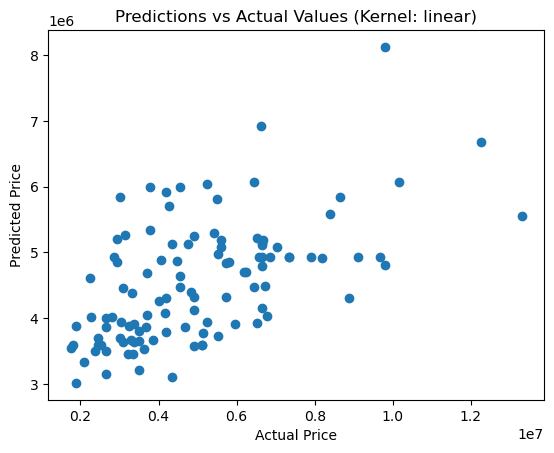

Mean Squared Error (Kernel: linear): 3765398904229.474
Mean Squared Error (Kernel: poly): 5567821806058.896
Mean Squared Error (Kernel: rbf): 5567931708587.371
Mean Squared Error (Kernel: sigmoid): 5568004961123.933


In [34]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

X = housing_data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = housing_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVR with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
mse_values = []

for kernel in kernels:
    svr_model = SVR(kernel=kernel)
    svr_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = svr_model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    # Plot predictions vs actual values for linear kernel
    if kernel == 'linear':
        plt.scatter(y_test, y_pred)
        plt.xlabel('Actual Price')
        plt.ylabel('Predicted Price')
        plt.title(f'Predictions vs Actual Values (Kernel: {kernel})')
        plt.show()

# Print MSE values for different kernels
for kernel, mse in zip(kernels, mse_values):
    print(f'Mean Squared Error (Kernel: {kernel}): {mse}')


The tried Kernel Transfortiom methods released a too high MSE though they still are not suitable to rely. Other 

### Step 8: Create a scenario for Overfitting in the context of regression

(Hint: You can
emulate this either by adjusting the subset of features or the size of the training
dataset to create scenarios where overfitting is more likely to occur)

Prove the overfitting with evidence (Hint: Metrics and Plots)

Now apply any two regularization methods and evaluate performance before
and after Regularization (Hint: Metrics and Plots)

In [61]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the housing data
housing_data = pd.read_csv('/Users/santiagowon/Dropbox/Santiago/01. Maestria/Advaced Mathematics and Statistics/Element 1 Assignment/data/housing.csv')

# One-hot encode categorical variables
housing_data = pd.get_dummies(housing_data, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'])

# Selecting features and target variable
X = housing_data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'parking', 'prefarea_yes']]
y = housing_data['price']

# Split the data into a larger training set (80%) and a smaller testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
linear_model_overfit = LinearRegression()

# Train the model on the larger training set
linear_model_overfit.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_pred_train = linear_model_overfit.predict(X_train)
y_pred_test = linear_model_overfit.predict(X_test)

# Evaluate the model using Mean Squared Error for training and testing
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print MSE for training and testing data
print(f'Mean Squared Error (Training): {mse_train}')
print(f'Mean Squared Error (Testing): {mse_test}')


Mean Squared Error (Training): 992481000009.7853
Mean Squared Error (Testing): 1800793719718.9675


The significantly lower Mean Squared Error (MSE) on the training set compared to the testing set is a clear indication of overfitting
https://baotramduong.medium.com/machine-learning-overfitting-vs-underfitting-96fe8b41192b#:~:text=Mean%20Squared%20Error%20(MSE)%20or,test%20MSE%20may%20indicate%20overfitting.

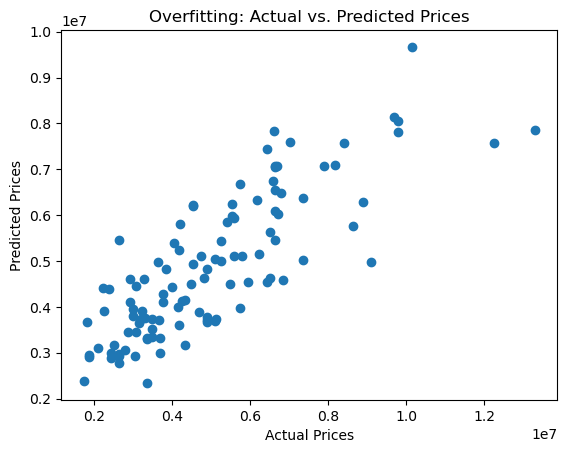

In [62]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted prices
plt.scatter(y_test_overfit, y_pred_overfit)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Overfitting: Actual vs. Predicted Prices")
plt.show()


In [77]:
from sklearn.linear_model import Ridge, Lasso

ridge_model = Ridge(alpha=1)

# Train Ridge model
ridge_model.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_pred_ridge_train = ridge_model.predict(X_train)
y_pred_ridge_test = ridge_model.predict(X_test)

# Evaluate Ridge model using Mean Squared Error for training and testing
mse_ridge_train = mean_squared_error(y_train, y_pred_ridge_train)
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge_test)

# Print MSE for Ridge model
print(f'Ridge Model - Mean Squared Error (Training): {mse_ridge_train}')
print(f'Ridge Model - Mean Squared Error (Testing): {mse_ridge_test}')
# Print the difference between training and testing MSE for Ridge
print(f'Difference (Ridge): {mse_ridge_train - mse_ridge_test}')


################

# Initialize Lasso Regression model with a chosen alpha value
lasso_model = Lasso(alpha=1)

# Train Lasso model
lasso_model.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_pred_lasso_train = lasso_model.predict(X_train)
y_pred_lasso_test = lasso_model.predict(X_test)

# Evaluate Lasso model using Mean Squared Error for training and testing
mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso_test)

# Print MSE for Lasso model
print(f'Lasso Model - Mean Squared Error (Training): {mse_lasso_train}')
print(f'Lasso Model - Mean Squared Error (Testing): {mse_lasso_test}')
# Print the difference between training and testing MSE for Lasso
print(f'Difference (Lasso): {mse_lasso_train - mse_lasso_test}')


Ridge Model - Mean Squared Error (Training): 992603219217.1198
Ridge Model - Mean Squared Error (Testing): 1803434954035.0925
Difference (Ridge): -810831734817.9728
Lasso Model - Mean Squared Error (Training): 992481000058.3799
Lasso Model - Mean Squared Error (Testing): 1800797221064.0198
Difference (Lasso): -808316221005.6399
